In [161]:
import pandapower as pp
import pandapower.plotting
import pandapower.shortcircuit as sc
from pandapower.plotting.plotly import simple_plotly

#create empty net
net = pp.create_empty_network() 

#create buses
b1 = pp.create_bus(net, vn_kv=220, name="Sys 1")
b2 = pp.create_bus(net, vn_kv=220, name="Sys 2")
b3 = pp.create_bus(net, vn_kv=220, name="Bus 1 220")
b4 = pp.create_bus(net, vn_kv=220, name="Bus 2 220")
b5 = pp.create_bus(net, vn_kv=110, name="Bus 1 110")
b6 = pp.create_bus(net, vn_kv=110, name="Bus 2 110")
b7 = pp.create_bus(net, vn_kv=110, name="Bus Load1 110")
b8 = pp.create_bus(net, vn_kv=110, name="Bus Load2 110")
b9 = pp.create_bus(net, vn_kv=35, name="Bus 1 35")
b10 = pp.create_bus(net, vn_kv=35, name="Bus 2 35")
b11 = pp.create_bus(net, vn_kv=35, name="Bus Load1 35")
b12 = pp.create_bus(net, vn_kv=35, name="Bus Load2 35")
b13 = pp.create_bus(net, vn_kv=35, name="Bus Load3 35")
b14 = pp.create_bus(net, vn_kv=35, name="Bus Load4 35")
b15 = pp.create_bus(net, vn_kv=0.4, name="Bus 1 0.4")
b16 = pp.create_bus(net, vn_kv=0.4, name="Bus 2 0.4")


#create grid elements - система
pp.create_ext_grid(net, bus=b1, vm_pu=1.05, name="Line 204")
#pp.create_ext_grid(net, bus=b2, vm_pu=1.02, name="Line 203")

#create load elements
pp.create_load(net, bus=b7, p_mw=25.1, q_mvar=0.05, name="Load1 110")
pp.create_load(net, bus=b8, p_mw=20.1, q_mvar=-1.05, name="Load2 110")
pp.create_load(net, bus=b11, p_mw=10.0, q_mvar=-1.05, name="Load1 35")
pp.create_load(net, bus=b12, p_mw=10.3, q_mvar=0.05, name="Load2 35")
pp.create_load(net, bus=b13, p_mw=10.0, q_mvar=0.05, name="Load3 35")
pp.create_load(net, bus=b14, p_mw=10.3, q_mvar=0.05, name="Load4 35")
pp.create_load(net, bus=b15, p_mw=0.5, q_mvar=0.05, name="Load1 0.4")
pp.create_load(net, bus=b16, p_mw=0.5, q_mvar=0.05, name="Load2 0.4")

#create trafo elements
# для создания трансформатора из параметров необходимо задать:
# для трёхобмоточного трансформатора
# sn_hv_mva - полная мощность обмотки высшего напряжения (ВН) [МВА]; sn_mv_mva - полная мощность обмотки среднего напряжения (СН) [МВА];
# sn_lv_mva - полная мощность обмотки низшего напряжения (НН) [МВА]; vk_hv_percent - напряжение короткого замыкания ВН-СН [%];
# vk_mv_percent - напряжение короткого замыкания (КЗ) СН-НН [%]; vk_lv_percent - напряжение короткого замыкания ВН-НН [%];
# vn_hv_kv - номинальное напряжение ВН [кВ]; vn_mv_kv - номинальное напряжение СН [кВ]; vn_lv_kv - номинальное напряжение НН [кВ];
# vkr_hv_percent - активная составляющая тока КЗ ВН-СН [%]; vkr_mv_percent - активная составляющая тока КЗ СН-НН [%]; vkr_lv_percent - активная составляющая тока КЗ ВН-НН [%];
# pfe_kw - активные потери в стали [кВт]; i0_percent - потери холостого хода [%]
trafo3w = pp.create_transformer3w_from_parameters(net, hv_bus=b3, mv_bus=b5, lv_bus=b9, sn_hv_mva = 63, sn_mv_mva=63, sn_lv_mva=38, vk_hv_percent = 10.5, vk_mv_percent = 6.5, vk_lv_percent = 17, vn_hv_kv=220, vn_mv_kv = 110, vn_lv_kv = 35, vkr_hv_percent=0.3, vkr_mv_percent=0.31, vkr_lv_percent=0.32, pfe_kw = 0.015, i0_percent = 0.3, name = "Trafo 1")
trafo3w = pp.create_transformer3w_from_parameters(net, hv_bus=b4, mv_bus=b6, lv_bus=b10, sn_hv_mva = 63, sn_mv_mva=63, sn_lv_mva=38, vk_hv_percent = 10.5, vk_mv_percent = 6.5, vk_lv_percent = 17, vn_hv_kv=220, vn_mv_kv = 110, vn_lv_kv = 35, vkr_hv_percent=0.3, vkr_mv_percent=0.31, vkr_lv_percent=0.32, pfe_kw = 0.015, i0_percent = 0.3, name = "Trafo 2")

# для создания трансформатора из параметров необходимо задать:
# для трёхобмоточного трансформатора
# sn_mva - ноинальная полная мощность трансформатора [МВА];
# vk_percent - напряжение короткого замыкания (КЗ) [%];
# vn_hv_kv - номинальное напряжение ВН [кВ]; vn_lv_kv - номинальное напряжение НН [кВ];
# vkr_percent - активная составляющая тока КЗ [%];; pfe_kw - активные потери в стали [кВт]; i0_percent - потери холостого хода [%]
trafo = pp.create_transformer_from_parameters(net, hv_bus=b9, lv_bus=b15, sn_mva = 0.63, vk_percent=6.0, vn_hv_kv=35, vn_lv_kv = 0.4, vkr_percent=0.1425, pfe_kw=0.0135, i0_percent=0.3375, name="Trafo1 0.4")
trafo = pp.create_transformer_from_parameters(net, hv_bus=b10, lv_bus=b16, sn_mva = 0.63, vk_percent=6.0, vn_hv_kv=35, vn_lv_kv = 0.4, vkr_percent=0.1425, pfe_kw=0.0135, i0_percent=0.3375, name="Trafo2 0.4")

#create lines
# для создания линии из параметров необходимо задать:
# length_km - длина линии [км]; r_ohm_per_km - удельное активное сопротивление [Ом/км];
# x_ohm_per_km - удельное индуктивное сопротивление линии [Ом/км]; c_nf_per_km - удельная поперечная ёмкость [нФ/км];
# max_i_ka - максимальный ток линии (необязательный параметр), можно рассчитать, как 0,85А или 0,9А на 1 мм² сечения;
pp.create_line_from_parameters(net, from_bus = b1, to_bus = b3, length_km=41.5, r_ohm_per_km = .051, x_ohm_per_km = 0.42, c_nf_per_km = 8.594, max_i_ka = 0.51, name = "line-204")
pp.create_line_from_parameters(net, from_bus = b2, to_bus = b4, length_km=5.5, r_ohm_per_km = .051, x_ohm_per_km = 0.42, c_nf_per_km = 8.594, max_i_ka = 0.51, name = "line-203")

pp.create_line_from_parameters(net, from_bus = b5, to_bus = b7, length_km=5.1, r_ohm_per_km = .244, x_ohm_per_km = 0.427, c_nf_per_km = 8.27, max_i_ka = 0.4, name = "VL1 110")
pp.create_line_from_parameters(net, from_bus = b6, to_bus = b8, length_km=5.1, r_ohm_per_km = .244, x_ohm_per_km = 0.427, c_nf_per_km = 8.27, max_i_ka = 0.4, name = "VL2 110")

pp.create_line_from_parameters(net, from_bus = b9, to_bus = b11, length_km=3.1, r_ohm_per_km = .443, x_ohm_per_km = 0.127, c_nf_per_km = 150, max_i_ka = 0.199, name = "KL1 35")
pp.create_line_from_parameters(net, from_bus = b9, to_bus = b12, length_km=9.1, r_ohm_per_km = .443, x_ohm_per_km = 0.127, c_nf_per_km = 150, max_i_ka = 0.199, name = "KL2 35")
pp.create_line_from_parameters(net, from_bus = b10, to_bus = b13, length_km=2.1, r_ohm_per_km = .443, x_ohm_per_km = 0.127, c_nf_per_km = 150, max_i_ka = 0.199, name = "KL3 35")
pp.create_line_from_parameters(net, from_bus = b10, to_bus = b14, length_km=5.1, r_ohm_per_km = .443, x_ohm_per_km = 0.127, c_nf_per_km = 150, max_i_ka = 0.199, name = "KL4 35")


#create_switch
pp.create_switch(net, bus = 0, element = 1, et = 'b', closed=True, type ="CB", name = 'Q0', z_ohm=0.01)
pp.create_switch(net, bus = 2, element = 0, et = 'l', closed=True, type ="CB", name = 'Q1', z_ohm=0.01)
pp.create_switch(net, bus = 3, element = 1, et = 'l', closed=True, type ="CB", name = 'Q2', z_ohm=0.01)
pp.create_switch(net, bus = 2, element = 3, et = 'b', closed=False, type ="CB", name = 'Q3', z_ohm=0.01)
pp.create_switch(net, bus = 4, element = 5, et = 'b', closed=False, type ="CB", name = 'Q4', z_ohm=0.01)
pp.create_switch(net, bus = 4, element = 2, et = 'l', closed=True, type ="CB", name = 'Q5', z_ohm=0.01)
pp.create_switch(net, bus = 5, element = 3, et = 'l', closed=True, type ="CB", name = 'Q6', z_ohm=0.01)
pp.create_switch(net, bus = 8, element = 0, et = 't3', closed=True, type ="CB", name = 'Q7', z_ohm=0.01)
pp.create_switch(net, bus = 9, element = 1, et = 't3', closed=True, type ="CB", name = 'Q8', z_ohm=0.01)
pp.create_switch(net, bus = 8, element = 4, et = 'l', closed=True, type ="CB", name = 'Q9', z_ohm=0.01)
pp.create_switch(net, bus = 8, element = 5, et = 'l', closed=True, type ="CB", name = 'Q10', z_ohm=0.01)
pp.create_switch(net, bus = 9, element = 6, et = 'l', closed=True, type ="CB", name = 'Q11', z_ohm=0.01)
pp.create_switch(net, bus = 9, element = 7, et = 'l', closed=True, type ="CB", name = 'Q12', z_ohm=0.01)
pp.create_switch(net, bus = 14, element = 0, et = 't', closed=True, type ="CB", name = 'Q13', z_ohm=0.01)
pp.create_switch(net, bus = 15, element = 1, et = 't', closed=True, type ="CB", name = 'Q14', z_ohm=0.01)
pp.create_switch(net, bus = 8, element = 9, et = 'b', closed=False, type ="CB", name = 'Q15', z_ohm=0.01)

15

In [162]:
pp.runpp(net) # запуск сети

In [163]:
print(net.res_bus.vm_pu) #вывод напряжения на шинах в о.е.

0     1.050000
1     1.049993
2     1.047707
3     1.049644
4     1.043091
5     1.045064
6     1.040608
7     1.043272
8     1.044853
9     1.044406
10    1.034362
11    1.011495
12    1.037084
13    1.025929
14    1.038070
15    1.037619
Name: vm_pu, dtype: float64


In [164]:
print(net.res_line.loading_percent) #вывод загрузки линий

0    22.906024
1    20.284027
2    31.650028
3    25.326971
4    80.752315
5    84.485045
6    79.930548
7    83.242376
Name: loading_percent, dtype: float64


In [165]:
#расчёт токов КЗ
net["f_hz"] = 50.
net.ext_grid["s_sc_max_mva"] = 4573 #Ограничение мощности внешней сети
net.ext_grid["rx_max"] = 0.1 #Отношение величин активного сопротивления к реактивному

net.line["endtemp_degree"] = 20 #Значение температуры линии в момент короткого замыкания
sc.calc_sc(net, ith=True, ip=True, branch_results=True, return_all_currents=True) #Запуск функции расчёта
#help(sc.calc_sc)

#pp.to_excel(net, "d:/local/alexandr_bogdanov/CIM/Tmp/ttt/example2.xlsx")  # relative path
#pp.to_json(net, "d:/local/alexandr_bogdanov/CIM/Tmp/ttt/example.json")

print(net.res_bus_sc) #Вывод результатов
#print(net.branch_results) #Вывод результатов

Branch results are in beta mode and might not always be reliable, especially for transformers


      ikss_ka      ip_ka     ith_ka
0   12.001013  29.633134  12.204071
1   11.995508  29.592480  12.197013
2    4.785100  11.629348   4.856933
3    9.998370  24.560465  10.160846
4    2.577209   6.781166   2.661624
5    2.996868   8.008305   3.122270
6    2.378852   5.949017   2.423564
7    2.732884   6.874521   2.786982
8    3.746454  10.142953   3.950201
9    4.005493  10.939901   4.277507
10   3.413307   7.187062   3.437072
11   2.696477   4.517848   2.704448
12   3.760358   8.433015   3.795349
13   3.346674   6.282868   3.361630
14  15.734013  42.982843  16.809368
15  15.782987  43.134991  16.874874


No or insufficient geodata available --> Creating artificial coordinates. This may take some time


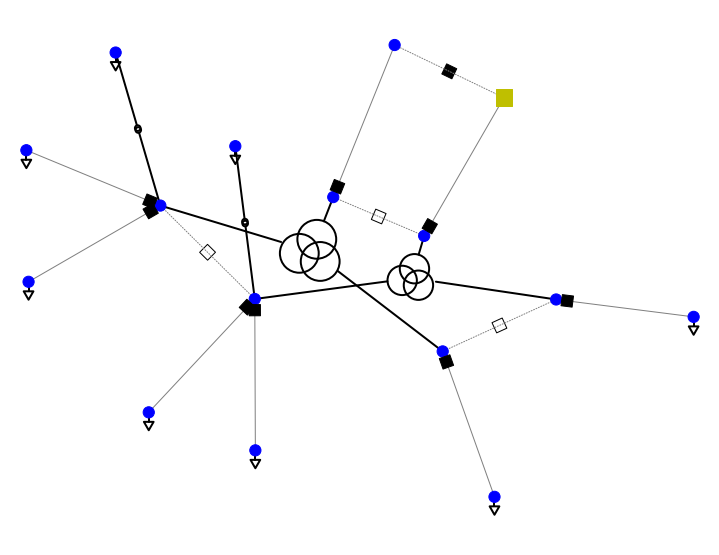

<AxesSubplot:>

In [166]:
# отрисовка схемы - чисто визуальный контроль состояния выключателей
pp.plotting.simple_plot(net, respect_switches=True, line_width=1.0, bus_size=1.0, trafo_size=0.5, plot_loads=True, plot_sgens=True, load_size=1.0, sgen_size=1.0, switch_size=2.0, switch_distance=1.0, plot_line_switches=True, scale_size=True, bus_color='b', line_color='grey', trafo_color='k', ext_grid_color='y', switch_color='k', library='igraph', show_plot=True, ax=None)